In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from PIL import Image, ImageOps
import IPython.display as display
import pathlib
from skimage.io import imread_collection
import os
import io
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
import pandas as pd
import seaborn as sns
from keras.models import load_model
import cv2
import itertools

In [2]:
cwd = os.getcwd()

In [3]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

np.set_printoptions(suppress=True)

# Melakukan load model
model = load_model('keras_model.h5')

#Melakukan shape 224,244, dengan color RGB (3) dan mengubah tipe data menjadi float32
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Membuka gambar yang akan dilakukan prediksi
image = Image.open('papules.jpg')
#Mengubah ukuran gambar
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#Memasukkan gambar yang telah diubah ukurannya
image_array = np.asarray(image)
# Melakukan nomrlisasi
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Menyimpang hasil normalisasi pada data
data[0] = normalized_image_array

# jalankan prediksi
prediction = model.predict(data)
print(prediction)

[[0.0000245  0.00285252 0.4878971  0.43892848 0.07001673 0.00024484
  0.0000358 ]]


In [4]:
img_class = {0 : "Blackhead",
             1 : "Acne Scar",
             2 : "Cystic Acne",
             3 : "Nodul",
             4 : "Papules",
             5 : "Pustules",
             6 : "Whitehead"
            }

In [5]:
img_class[np.argmax(prediction)]

'Cystic Acne'

In [6]:
img_class.values()

dict_values(['Blackhead', 'Acne Scar', 'Cystic Acne', 'Nodul', 'Papules', 'Pustules', 'Whitehead'])

In [7]:
for i in img_class.values():
    print(i)

Blackhead
Acne Scar
Cystic Acne
Nodul
Papules
Pustules
Whitehead


In [8]:
cols = prediction

In [9]:
list_cols = list(cols)

In [10]:
list_cols[0]

array([0.0000245 , 0.00285252, 0.4878971 , 0.43892848, 0.07001673,
       0.00024484, 0.0000358 ], dtype=float32)

In [11]:
prediction_values = prediction

In [12]:
prediction_values_list = prediction_values.tolist()

In [13]:
prediction_values_list

[[2.450489773764275e-05,
  0.0028525192756205797,
  0.4878970980644226,
  0.438928484916687,
  0.07001673430204391,
  0.0002448437735438347,
  3.579894837457687e-05]]

In [14]:
prediction_values_list[0][1]

0.0028525192756205797

In [15]:
key_img_class = list(img_class)
np.set_printoptions(suppress=True)
a = 0
for i in img_class.values():
    if img_class[np.all(prediction)]:
        print("{acne} : {values}".format(acne = i, values = prediction_values_list[0][a]))
        a+=1

print("\nJenis jerawat terdeteksi tertinggi  adalah {acne} dengan nilai {values}".format(acne = img_class[np.argmax(prediction)], 
                                                                                     values = np.max(prediction)))
print("\nJenis jerawat terdeteksi terendah adalah {acne} dengan nilai {values}".format(acne = img_class[np.argmin(prediction)],
                                                                                      values = np.min(prediction)))

Blackhead : 2.450489773764275e-05
Acne Scar : 0.0028525192756205797
Cystic Acne : 0.4878970980644226
Nodul : 0.438928484916687
Papules : 0.07001673430204391
Pustules : 0.0002448437735438347
Whitehead : 3.579894837457687e-05

Jenis jerawat terdeteksi tertinggi  adalah Cystic Acne dengan nilai 0.4878970980644226

Jenis jerawat terdeteksi terendah adalah Blackhead dengan nilai 2.450489773764275e-05


In [16]:
labelsss = list(img_class.values())
labelsss

['Blackhead',
 'Acne Scar',
 'Cystic Acne',
 'Nodul',
 'Papules',
 'Pustules',
 'Whitehead']

In [18]:
number_prediction = prediction_values_list
number_prediction_1d = list(itertools.chain(*number_prediction)) #Convert 2 dimensi list menjadi 1 dimensi
number_prediction_1d

[2.450489773764275e-05,
 0.0028525192756205797,
 0.4878970980644226,
 0.438928484916687,
 0.07001673430204391,
 0.0002448437735438347,
 3.579894837457687e-05]

In [19]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i],5), horizontalalignment='center')

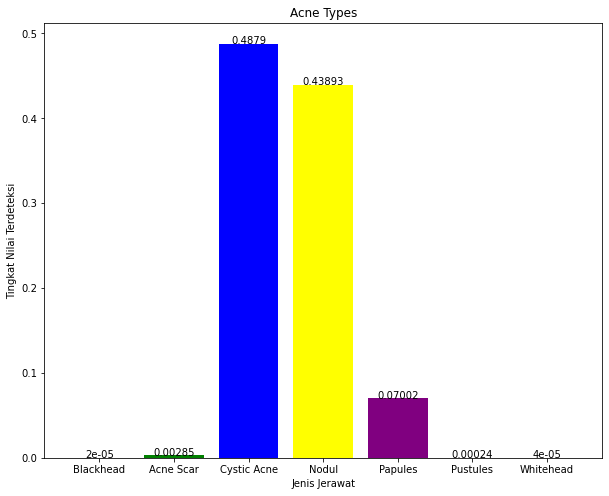

In [21]:
plt.figure(figsize=(10,8))
plt.bar(labelsss,number_prediction_1d, color = ['red','green','blue','yellow','purple'])
plt.title("Acne Types")
plt.xlabel("Jenis Jerawat")
plt.ylabel("Tingkat Nilai Terdeteksi")
addlabels(labelsss,number_prediction_1d)
plt.show()